In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.metrics import classification_report, precision_recall_curve, auc
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

import torch 
import os
import torch

import warnings
warnings.filterwarnings("ignore")

In [2]:
## Load original data
data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/Dataset/return_feature_train.csv"
data = pd.read_csv(data_path, low_memory=False)

##load test data
test_data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/Dataset/return_feature_test.csv"
test_data = pd.read_csv(test_data_path)

#Fake dataset
fake_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/tablegan/samples/return_feature/return_feature_OI_11_00_fake.csv"
fake = pd.read_csv(fake_path)
fake['loan_status'] = 1

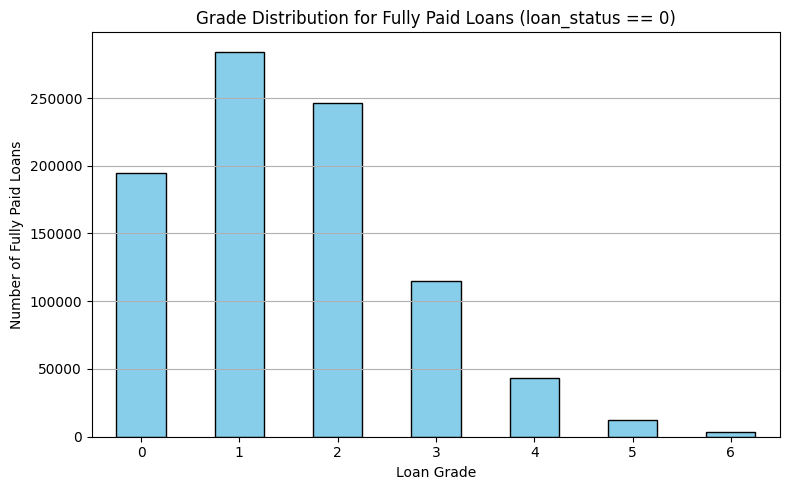

In [7]:
data_FP = data[data['loan_status'] == 0]

# 2. grade별 개수 세기
grade_counts = data_FP['grade'].value_counts().sort_index()

# 3. 시각화
plt.figure(figsize=(8, 5))
grade_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# 4. 시각화 스타일
plt.title("Grade Distribution for Fully Paid Loans (loan_status == 0)")
plt.xlabel("Loan Grade")
plt.ylabel("Number of Fully Paid Loans")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

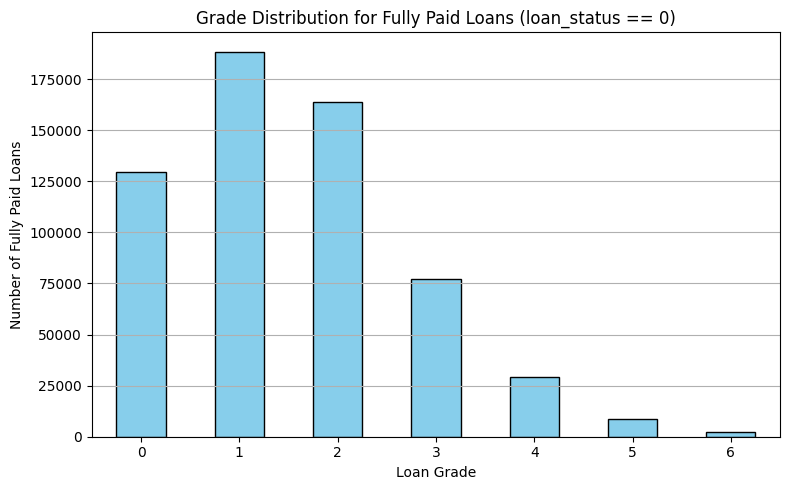

In [3]:
test_FP = test_data[test_data['loan_status'] == 0]

# 2. grade별 개수 세기
grade_counts = test_FP['grade'].value_counts().sort_index()

# 3. 시각화
plt.figure(figsize=(8, 5))
grade_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# 4. 시각화 스타일
plt.title("Grade Distribution for Fully Paid Loans (loan_status == 0)")
plt.xlabel("Loan Grade")
plt.ylabel("Number of Fully Paid Loans")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

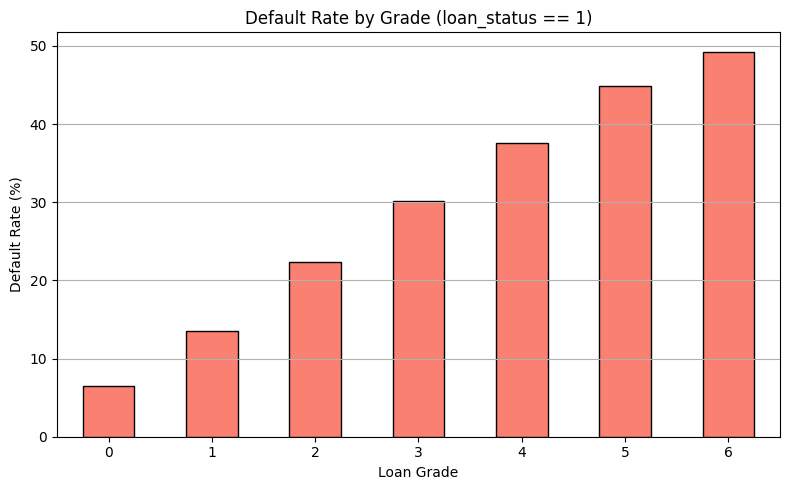

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# (전제: test_data에는 'grade'와 'loan_status' 컬럼이 존재해야 합니다)

# 1. 전체 건수 대비 default 건수 비율 계산
grade_total = data.groupby('grade')['loan_status'].count()
grade_default = data[data['loan_status'] == 1].groupby('grade')['loan_status'].count()

# 2. default 비율 계산 (없으면 0으로 처리)
default_rate = (grade_default / grade_total).fillna(0) * 100

# 3. 시각화
plt.figure(figsize=(8, 5))
default_rate.sort_index().plot(kind='bar', color='salmon', edgecolor='black')

plt.title("Default Rate by Grade (loan_status == 1)")
plt.xlabel("Loan Grade")
plt.ylabel("Default Rate (%)")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


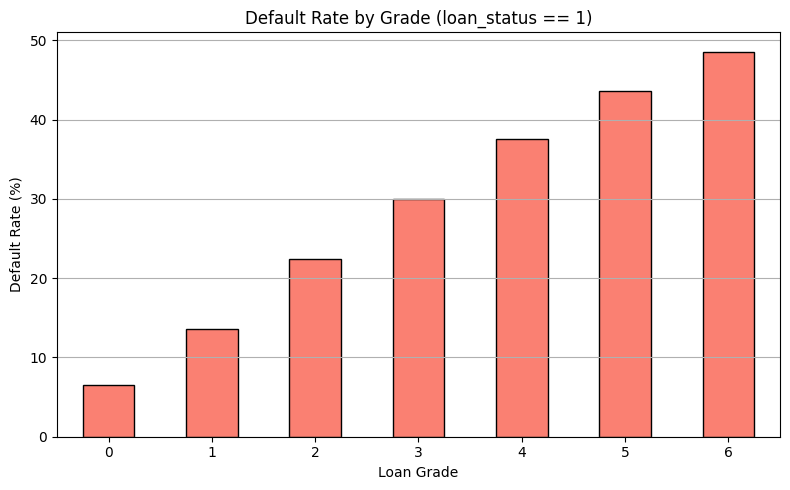

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# (전제: test_data에는 'grade'와 'loan_status' 컬럼이 존재해야 합니다)

# 1. 전체 건수 대비 default 건수 비율 계산
grade_total = test_data.groupby('grade')['loan_status'].count()
grade_default = test_data[test_data['loan_status'] == 1].groupby('grade')['loan_status'].count()

# 2. default 비율 계산 (없으면 0으로 처리)
default_rate = (grade_default / grade_total).fillna(0) * 100

# 3. 시각화
plt.figure(figsize=(8, 5))
default_rate.sort_index().plot(kind='bar', color='salmon', edgecolor='black')

plt.title("Default Rate by Grade (loan_status == 1)")
plt.xlabel("Loan Grade")
plt.ylabel("Default Rate (%)")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [9]:
keep_features = ['term_months', 'total_pymnt', 'total_pymnt_inv']

data_classification = data.copy()
test_classification = test_data.copy()

data_classification = data_classification.drop(columns = keep_features)
test_classification = test_classification.drop(columns = keep_features)

In [10]:
data_x = data_classification.drop(columns='loan_status')
data_y = data_classification[['loan_status']]

X_test = test_classification.drop(columns='loan_status')
y_test = test_classification[['loan_status']]

In [11]:
# data under 6:2:2 train,val,test set
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.2, random_state=42, stratify=data_y)

print(f"Train size: {X_train.shape[0]} samples ({X_train.shape[0]/len(data):.1%})")
print(f"Validation size: {X_val.shape[0]} samples ({X_val.shape[0]/len(data):.1%})")
print(f"Test size: {X_test.shape[0]} samples ({X_test.shape[0]/len(data):.1%})")

Train size: 893166 samples (80.0%)
Validation size: 223292 samples (20.0%)
Test size: 744306 samples (66.7%)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

#pos, neg = y_test.value_counts()  # ✅ `.values`로 NumPy 배열 변환
#scale_pos_weight = neg / pos  # 클래스 비율 계산

# 1️⃣ XGBoost 모델 정의
model_base = XGBClassifier(
    #scale_pos_weight=scale_pos_weight, 
    n_estimators=1000,
    learning_rate=0.01,
    objective='binary:logistic',
    eval_metric="logloss",
    random_state=42,
    verbose = True
)

[0]	validation_0-logloss:0.49195	validation_1-logloss:0.49198
[1]	validation_0-logloss:0.48735	validation_1-logloss:0.48739
[2]	validation_0-logloss:0.48287	validation_1-logloss:0.48294
[3]	validation_0-logloss:0.47851	validation_1-logloss:0.47860
[4]	validation_0-logloss:0.47427	validation_1-logloss:0.47437
[5]	validation_0-logloss:0.47013	validation_1-logloss:0.47026
[6]	validation_0-logloss:0.46610	validation_1-logloss:0.46624
[7]	validation_0-logloss:0.46216	validation_1-logloss:0.46233
[8]	validation_0-logloss:0.45833	validation_1-logloss:0.45851
[9]	validation_0-logloss:0.45458	validation_1-logloss:0.45478
[10]	validation_0-logloss:0.45092	validation_1-logloss:0.45114
[11]	validation_0-logloss:0.44734	validation_1-logloss:0.44758
[12]	validation_0-logloss:0.44385	validation_1-logloss:0.44410
[13]	validation_0-logloss:0.44043	validation_1-logloss:0.44070
[14]	validation_0-logloss:0.43709	validation_1-logloss:0.43738
[15]	validation_0-logloss:0.43382	validation_1-logloss:0.43412
[1

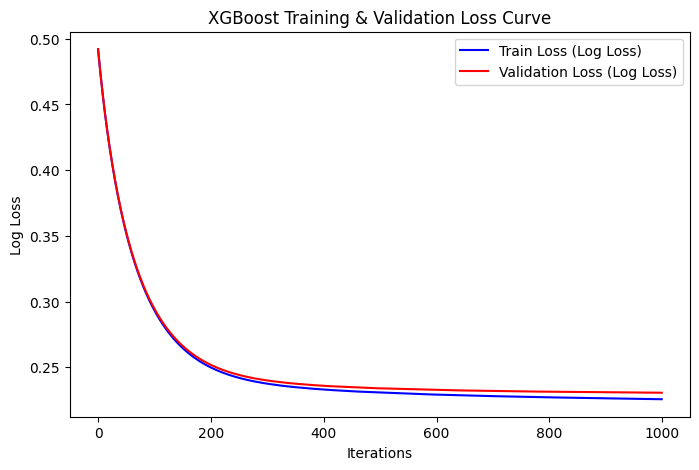

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    599114
           1       0.74      0.75      0.75    145192

    accuracy                           0.90    744306
   macro avg       0.84      0.84      0.84    744306
weighted avg       0.90      0.90      0.90    744306



In [13]:
model_base.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Train & Validation Loss 저장
    verbose=True
)

# 3️⃣ 학습 과정에서 저장된 Train & Validation Loss 가져오기
evals_result = model_base.evals_result()  # 🔹 변경된 코드 (학습 후 결과 확인)
train_loss = evals_result['validation_0']['logloss']  # Training Loss
val_loss = evals_result['validation_1']['logloss']    # Validation Loss

# 4️⃣ Train & Validation Loss 시각화
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train Loss (Log Loss)', color='blue')
plt.plot(val_loss, label='Validation Loss (Log Loss)', color='red')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('XGBoost Training & Validation Loss Curve')
plt.legend()
plt.show()

# 5️⃣ 예측 및 평가
#y_pred = model.predict(X_test)
y_prob = model_base.predict_proba(X_test)[:, 1]  # ROC Curve & PRC에 필요

threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

# 🔹 Classification Report 출력
print("🔹 Classification Report:")
print(classification_report(y_test, y_pred))

In [15]:
y_test_series = y_test.squeeze() if isinstance(y_test, pd.DataFrame) else y_test

# 2️⃣ FP 인덱스 찾기
fp_mask = (y_test_series == 0) & (y_pred == 1)

# 3️⃣ test_data에서 FP 샘플 추출
fp_samples = test_data.loc[fp_mask]

# 4️⃣ grade별 FP 개수 세기
fp_by_grade = fp_samples['grade'].value_counts().sort_index()

# 5️⃣ 결과 출력
print("🔎 False Positives by Grade:")
print(fp_by_grade)

🔎 False Positives by Grade:
grade
0     2325
1     8618
2    12119
3     8516
4     4174
5     1512
6      437
Name: count, dtype: int64


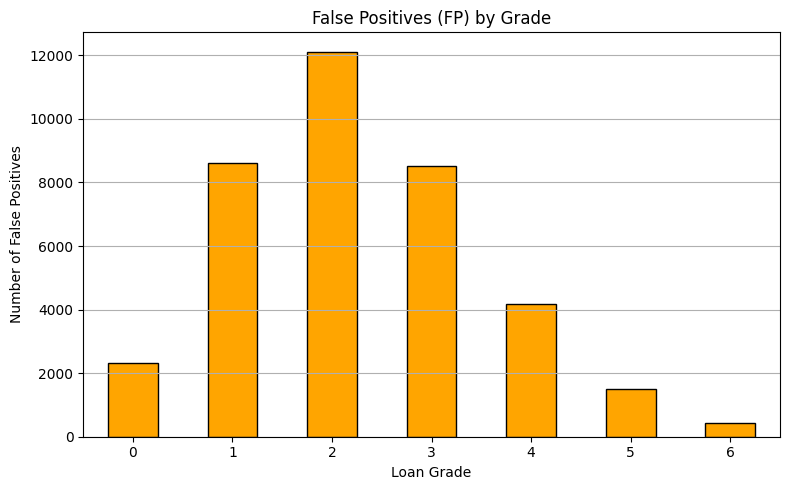

In [16]:
plt.figure(figsize=(8, 5))
fp_by_grade.plot(kind='bar', color='orange', edgecolor='black')
plt.title("False Positives (FP) by Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Number of False Positives")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
fake['grade'].value_counts()

grade
3.0    203254
2.0    116806
4.0    113228
1.0     80874
5.0     62308
6.0     23530
Name: count, dtype: int64

In [20]:
train = pd.concat([X_train,y_train], axis = 1)

train_total = pd.concat([train, fake])

train_total['loan_status'].value_counts()

loan_status
1    774231
0    718935
Name: count, dtype: int64